In [1]:
from lib.cost import CrossEntropy, CrossEntropy_Derivative
from lib.layers import InputLayer, DenseLayer, FlattenLayer
from lib.networks.sequential import SequentialModel
from lib.util import get_predictions, get_accuracy
from lib.activations import Softmax, ReLU, ReLU_Derivative

import pickle
import numpy as np
import pandas as pd
from random import randint
from matplotlib import pyplot as plt

In [3]:
test_data = pd.read_csv('./datasets/mnist/test.csv')
train_data = pd.read_csv('./datasets/mnist/train.csv')

Y_test = test_data['label'].values
X_test = test_data.drop('label', axis=1).values.T / 255.

Y_train = train_data['label'].values
X_train = train_data.drop('label', axis=1).values.T / 255.

In [4]:
schema = [
    InputLayer("input"),
    FlattenLayer("flatten"),
    DenseLayer("hidden", 100, activation=ReLU, activation_deriv=ReLU_Derivative),
    DenseLayer("output", 10, activation=Softmax, cost_function=CrossEntropy_Derivative)
]

# model = SequentialModel(schema, name="MNIST")

model = SequentialModel.load("models/MNIST.model", "Basic MNIST Model")

model.display()

Output()

In [7]:
X_train_images = X_train.reshape(28, 28, X_train.shape[-1], order='F')
X_test_images = X_test.reshape(28, 28, X_test.shape[-1], order='F')

In [8]:
print("Achieved {:.2f}%% accuracy against the test set.".format(model.test_accuracy(X_test_images, Y_test)))

Achieved 96.57%% accuracy against the test set.


In [8]:
alpha = 0.01
iterations = 500
batch_size = None


model.run_gradient_descent(X_train_images, Y_train, alpha, iterations, batch_size)

Output()

In [59]:
alpha = 0.01
iterations = 10
batch_size = None

model.run_gradient_descent(X_train_images, Y_train, alpha, iterations, batch_size)

In [29]:
print("Achieved {:.2f}%% accuracy against the test set.".format(model.test_accuracy(X_test_images, Y_test)))

Achieved 94.40%% accuracy against the test set.


In [46]:
model.save()

Predicted:  2
Expected:  1


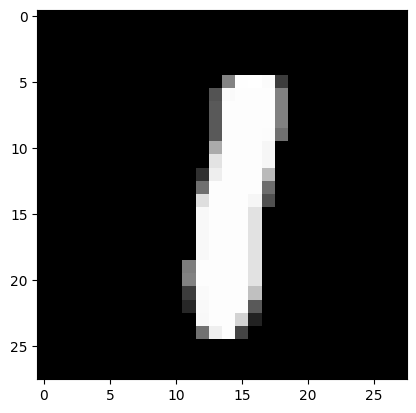

Predicted:  0
Expected:  2


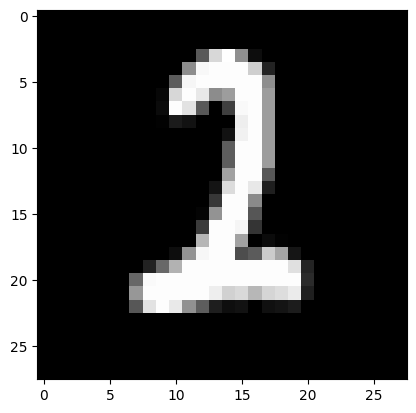

Predicted:  7
Expected:  3


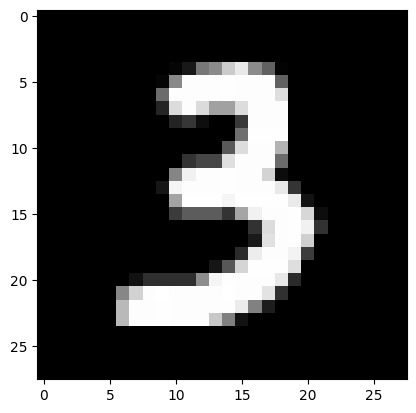

In [67]:
batch_size = 3

sample = randint(0, X_test_images.shape[-1]);
image = X_test_images[:, :, sample:sample+batch_size];

predicted = model.predict(image);

for i in range(0, len(predicted)):
  print("Predicted: ", predicted[i]);
  print("Expected: ", Y_test[sample + i]);
  plt.imshow(image.T[i], cmap="gray");
  plt.show()